In [1]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

# Modelling & Numerical Methods <a class="tocSkip">

## ODE solvers (or time-stepping methods - numerical solution of IVPs) 2 <a class="tocSkip">
    
### Homework Exercises <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---SciPy-methods-comparison" data-toc-modified-id="Homework---SciPy-methods-comparison-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - SciPy methods comparison</a></span></li><li><span><a href="#Homework---The-van-der-Pol-problem" data-toc-modified-id="Homework---The-van-der-Pol-problem-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - The van der Pol problem</a></span></li><li><span><a href="#Homework---L-stability-[$\star$]" data-toc-modified-id="Homework---L-stability-[$\star$]-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - L-stability [$\star$]</a></span></li><li><span><a href="#Homework---Implementing-Runge-Kutta-4-stage-method-(RK4)" data-toc-modified-id="Homework---Implementing-Runge-Kutta-4-stage-method-(RK4)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Implementing Runge-Kutta 4 stage method (RK4)</a></span></li><li><span><a href="#Homework---Implementing-Adams-Bashforth-4-step-method-(AB4)" data-toc-modified-id="Homework---Implementing-Adams-Bashforth-4-step-method-(AB4)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Implementing Adams-Bashforth 4-step method (AB4)</a></span></li><li><span><a href="#Homework---Adaptive-time-stepping-(implementing-RK45---the-Dormand-Prince-embedded-RK-pair)-[$\star\star$]" data-toc-modified-id="Homework---Adaptive-time-stepping-(implementing-RK45---the-Dormand-Prince-embedded-RK-pair)-[$\star\star$]-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - Adaptive time stepping (implementing RK45 - the Dormand-Prince embedded RK pair) [$\star\star$]</a></span></li><li><span><a href="#Homework---The-Lorenz-system-(with-RK4-and-RK45)" data-toc-modified-id="Homework---The-Lorenz-system-(with-RK4-and-RK45)-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Homework - The Lorenz system (with RK4 and RK45)</a></span></li><li><span><a href="#Homework---Perturbing-initial-conditions-(in-the-Lorenz-problem)-[$\star$]" data-toc-modified-id="Homework---Perturbing-initial-conditions-(in-the-Lorenz-problem)-[$\star$]-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Homework - Perturbing initial conditions (in the Lorenz problem) [$\star$]</a></span></li><li><span><a href="#Homework---The-Kepler-problem-with-adaptive-time-stepping-[$\star$]" data-toc-modified-id="Homework---The-Kepler-problem-with-adaptive-time-stepping-[$\star$]-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Homework - The Kepler problem with adaptive time stepping [$\star$]</a></span></li><li><span><a href="#Homework---Structure-preservation-(geometric-integrators-applied-to-the-Kepler-problem)-[$\star\star$]" data-toc-modified-id="Homework---Structure-preservation-(geometric-integrators-applied-to-the-Kepler-problem)-[$\star\star$]-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Homework - Structure preservation (geometric integrators applied to the Kepler problem) [$\star\star$]</a></span></li><li><span><a href="#Homework---ODE-solver-timings-(non-stiff-problems)-[$\star\star$]" data-toc-modified-id="Homework---ODE-solver-timings-(non-stiff-problems)-[$\star\star$]-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Homework - ODE solver timings (non-stiff problems) [$\star\star$]</a></span></li><li><span><a href="#Homework---ODE-solver-timings-(stiff-problems)-[$\star\star$]" data-toc-modified-id="Homework---ODE-solver-timings-(stiff-problems)-[$\star\star$]-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Homework - ODE solver timings (stiff problems) [$\star\star$]</a></span></li></ul></li></ul></div>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
# from mpltools import annotation

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

from matplotlib import rcParams
# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Homework

## Homework - SciPy methods comparison

Consider the ODE

$$ y' = y - t^2 +1, \;\;\;\;\; y(0) = \frac{1}{2},$$

with exact solution

$$ y(t) = (t + 1)^2 - \frac{e^{t}}{2}. $$

Read the docs for some of the SciPy ODE solvers, e.g. [`scipy.integrate.odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) and [`scipy.integrate.solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html).

Use a range of methods to integrate this problem from $t=0$ to $t=4$, vary the rtol and atol error tolerance parameters (for simplicity just set them equal to the same value for each experiment) and plot the error for each of the methods at the end of the simulation period against the tolerance value.

In [3]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
def ode(y, t):
    return y - t ** 2 + 1
def analytic_solution(y,t):
    return (t+1)**2 - (np.exp(t)/2)

In [15]:
[1,2,3][::-1]

[3, 2, 1]

In [78]:
tols = [1/i for i in range(1,30)]
print(tols)
errors_m1 = []
errors_m2 = []
print("hello world")    
# Initial conditions
y0 = 1/2
# Time points at which to compute the solution
t = np.linspace(0, 4, 1001)
for tol in tols:
    # computational solution 1
    copmutational_solution_1 = odeint(
        ode, 
        y0=y0, 
        t=t,
        atol=tol,
        rtol=tol

    )

    # computational solution 2
    copmutational_solution_2 = solve_ivp(
        ode, 
        t_span=(0,4), 
        y0=[y0], 
        method='RK45', 
        t_eval=t,
        atol=tol,
        rtol=tol
    )


#     print(*copmutational_solution_1[-1])
    acc = analytic_solution(0, 4)
#     print(acc)
#     print()
#     print(copmutational_solution_2.y[0][-1])


#     print(tols)
    errors_m1.append(*abs(acc-copmutational_solution_1[-1]))
    errors_m2.append(abs(acc-copmutational_solution_2.y[0][-1]))

# print(errors_m1)
# print(errors_m2)




[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 0.058823529411764705, 0.05555555555555555, 0.05263157894736842, 0.05, 0.047619047619047616, 0.045454545454545456, 0.043478260869565216, 0.041666666666666664, 0.04, 0.038461538461538464, 0.037037037037037035, 0.03571428571428571, 0.034482758620689655]
hello world


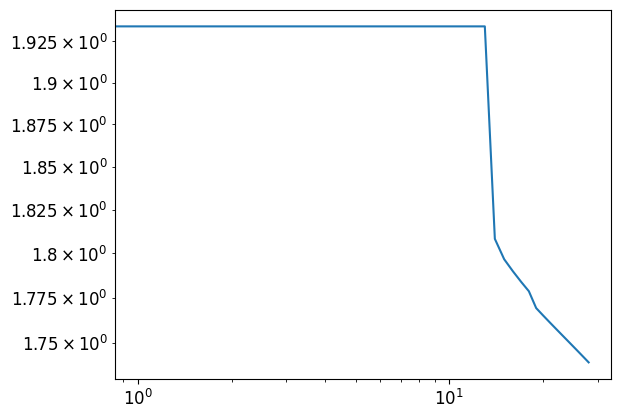

In [104]:
plt.loglog(errors_m1)

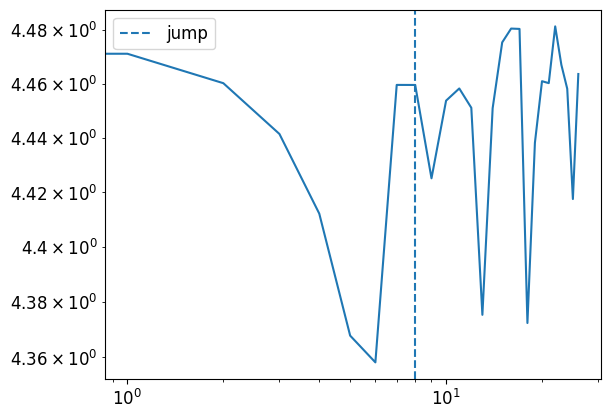

In [107]:
# plt.plot(errors_m2[9:])
plt.loglog([*errors_m2[1:8],*errors_m2[9:]])
# plt.loglog(errors_m2)
plt.axvline(8, ls="--", label="jump")
plt.legend()


In [81]:
:

SyntaxError: invalid syntax (1305497275.py, line 1)

## Homework - The van der Pol problem

Consider now the van der Pol oscillator problem which can be used to model electrical circuits.


For background see:

<https://en.wikipedia.org/wiki/Van_der_Pol_oscillator>

<http://mathworld.wolfram.com/vanderPolEquation.html>

<https://archimede.dm.uniba.it/~testset/problems/vdpol.php>


This second-order problem can be written as the first-order system

$$ y_1' = y_2, \;\;\;\; y_2' = \mu (1 - y_1^2)y_2 - y_1,$$

where $\mu$ is a parameter we can vary to change the characteristics of the problem. Start with a value of $\mu = 100$, and you could then try making this smaller/larger (but be careful about making it much larger as the problem becomes stiff and our solvers not designed to handle stiff problems start taking a very long time to complete! Refer to the final questions which consider errors vs CPU times for non-stiff and then stiff problem).

Consider a case with initial condition $y_1 = 2$ and $y_2=0$, and integrate up to time $t=2\mu$.

Repeat the error vs tolerance analysis from the previous question.

To compute the error use a Radau solver with a very tight tolerance.

In [98]:
def ode_1(y_prime_1):
    return y_2

def ode_2(mu, y_1, y_2):
    return mu * (1 - (y_1**2)) * y_2 - y_1

ode_2(100,2,0)

-2

In [97]:
copmutational_solution_1 = odeint(
    func=ode_1, 
    y0=y0, 
    t=t

)

NameError: name 'y_2' is not defined

<div class="optional">

## Homework - L-stability [$\star$]

From the lecture (the discussion on L-stability), consider the problem

$$y'(t) = \lambda(y - \cos(t)) - \sin(t), \;\;\;\; y(0) = y_0.$$

The exact solution to this problem is 

$$y(t) = \text{e}^{\lambda t}(y_0 - 1) + \cos(t).$$

Write some code that time steps this problem with the initial condition $y_0=1.5$ using both the backward Euler and the trapezoidal schemes. 

Note that since this is a scalar linear problem, we can just rearrange our implicit schemes for this problem to arrive at updates of the form `y[n+1] = ...` where the RHS of the expression contains things we know, meaning you do not have to call a nonlinear solver.

Try to choose values of $\lambda$ the give the behaviour for the two schemes as presented in the image in the L-stability section of the lecture.

Verify the claims we made in the lecture: "Note that reducing the time step does not help. But this problem with the trapezoidal scheme does not manifest if we start with the initial condition $y_0=1$."

</div>

## Homework - Implementing Runge-Kutta 4 stage method (RK4)

Write a general Python function that implements the classical RK4 method for a given RHS function, and apply it to the problem we used previously to compare the errors between forward Euler and improved Euler (recalling that we can interpret IE as a predictor-corrector LMS pair, or as a Runge-Kutta method RK2($\alpha=1$)):

$$y'(t)=y,\;\;\; y(0)=1,$$

and where we evaluate the error at the time $t = 2\pi$.

## Homework - Implementing Adams-Bashforth 4-step method (AB4)

In the lecture we derived AB2 by choosing our free parameters ($\beta_0\,$ and $\,\beta_1$) such that we could integrate exactly the monomials $f(t) = 1$ and $f(t)=t$. This led to two simultaneous equations we could trivially solve.

Try extending this to the case of AB4 - now we have four free parameters ($\beta_0, \ldots, \beta_3$) and we need to integrate polynomials up to degree 3 exactly.

Derive the corresponding system of 4 equations for 4 unknowns.

**[Hint**: your life will be easier when computing the integrals if you consider a polynomial basis of the form $P_{N+1}(t) = t (t + \Delta t) \dots (t + N\Delta t)$

(note that this is consistent with what we did for AB2, but now we aren't using monomials any more for $N>1$, i.e. additionally consider the cases $f(t)=t(t+\Delta t)$ and $f(t)=t(t+\Delta t)(t+2\Delta t)$).


Can you see where this hint came from - why is this a convenient choice, if again as per the AB2 derivation in the lecture we assume $t_{n+1} = \Delta t,\; t_n = 0$, $t_{n-1} = -\Delta t$, $t_{n-2} = -2\Delta t$, ...?


Write a script which forms and solves the resulting linear system for the AB coefficients, for $k=4$.

Check your coefficients agree with those given in the lecture, e.g. with something like

```python
AB4_beta = np.linalg.solve(LHS_A, RHS_b)  
print('Our calculated AB4 coefficients: ',AB4_beta)
print('Our coefficient agree with what we wrote in the lecture: ',np.allclose(AB4_beta, np.array([ 55./24., -59./24., 37./24., -9./24.])))
```
**]**


and then implement and verify the method following the implementation and convergence approach taken in the homework exercise from the previous lecture (`Homework: Improved Euler and accuracy comparison with forward Euler`).

As the scheme isn't self-starting use the appropriate number of time steps from an appropriate order RK method to start things off.

<div class="advanced">

## Homework - Adaptive time stepping (implementing RK45 - the Dormand-Prince embedded RK pair) [$\star\star$]

Try implementing the Dormand and Price embedded RK pair (<https://en.wikipedia.org/wiki/Dormand%E2%80%93Prince_method>) with adaptive time stepping.

[Given 4th and 5th order approximations to the solution at the new time level (`y4` and `y5`), the error control component of the method can be written something like

```Python
        # error control
        e = np.linalg.norm(y5 - y4)/np.sqrt(y.size)
        dt_next = 0.9 * (tol/e)**(1./5.) * dt
        if e < tol:
            y = y5
            y_all.append(y)
            t = t + dt
            t_all.append(t) 
        dt = dt_next
```
where $e$ is an estimate of the local error obtained as the norm of the difference between the two numerical solutions and 0.9 is a safety factor. Note that additional factors can easily be incorporated to limit how rapidly the time step size is allowed to increase or decrease. We haven't bothered to do this here and this is why our dt's don't quite match those obtained with SciPy.

For more information on this if interested see Chapter II.4 (Practical Error Estimation and Step Size Selection) of *Solving Ordinary Differential Equations I: Nonstiff Problems* by Hairer, Nørsett and Wanner.]

To make your life easier the entries of the Butcher tableau for the scheme are given in the following cell.

Test the solver of one of the problems we have seen before.

You should also test that your implementation works for both scalar and vector problems.

</div>

## Homework - The Lorenz system (with RK4 and RK45)

Repeat the Lorenz system exercise from the previous lecture's homework using our new RK4 and RK45 solvers.

<div class="optional">

## Homework - Perturbing initial conditions (in the Lorenz problem) [$\star$]

In order to think about how long we can reasonably expect to follow a complex trajectory such as in the Lorenz system before we start to see divergence, see what happens if you start two simulations with slightly different initial conditions. i.e. perturb your initial condition using a small random vector and track how the trajectories diverge.

I suggest you try this with RK4.

</div>

<div class="optional">
    
## Homework - The Kepler problem with adaptive time stepping [$\star$]

Repeat the Kepler problem exercise from Lecture 5's homework using our own RK45 method (or alternatively Scipy's `solve_ivp` with the option `RK45`).

Plot how the time step size varies in time - does it make sense when you have larger vs smaller time steps?

See if you get agreement for the time step sizes between our and SciPy's RK45 implementation.

</div>

<div class="advanced">

## Homework - Structure preservation (geometric integrators applied to the Kepler problem) [$\star\star$]

Implement the symplectic Euler method and compare this to our other three methods we have applied to the Kepler problem.

For details of the method see <https://en.wikipedia.org/wiki/Semi-implicit_Euler_method>.

As the name implies this is an example of a [*symplectic*](https://en.wikipedia.org/wiki/Symplectic_integrator) time stepping method. We don't have time to go into what this means, we simply state that methods such as this (a class of [*geometric integrator*](https://en.wikipedia.org/wiki/Geometric_integrator)) well suited to problems where it is important to try and preserve conservation laws (as well as related "geometric" structures. 

</div>

<div class="advanced">

## Homework - ODE solver timings (non-stiff problems) [$\star\star$]

In an earlier homework question we compared a variety of SciPy's ODE solver methods on the problem

$$ y' = y - t^2 +1, \;\;\;\;\; y(0) = \frac{1}{2},$$

which has the exact solution

$$ y(t) = (t + 1)^2 - \frac{e^{t}}{2}. $$

We integrated from $t=0$ and evaluating the error at $t=4$.

We varied the rtol and atol error tolerance parameters to generate plots of the 'error' vs the 'user-specified error tolerance'.

This was interesting but of far more value would be an analysis of errors vs run times.

Extend the homework exercise by recording solution timings (e.g. look back at Lecture 3's use of `%timeit` to provide estimates of run times.)

What do you observe from these results, and the differences observed between the 'error' vs 'tolerance' and 'error' vs 'run time' plots?

Finally, see how our own implementations of improved Euler (IE), AM3, RK4 and RK45 (i.e. our Dormand & Prince adaptive time stepping solver) compare. What conclusions can you draw from this comparison? 

</div>

<div class="advanced">

## Homework - ODE solver timings (stiff problems) [$\star\star$]

Consider now a vector problem demonstrating stiff behaviour.

Recall from the lecture the problem of the form

$$ y'' + (\mu + 1) y' + \mu y = 0 , $$

or equivalently

$$ \boldsymbol{z}'=A\boldsymbol{z}\;\;\;\text{where}
\;\;\;\; \boldsymbol{z} = 
\begin{bmatrix}
y\\
y'
\end{bmatrix}
\;\;\;\text{and}
\;\;\;\; 
A =
\begin{bmatrix}
0 & 1\\
-\mu & -(\mu + 1)
\end{bmatrix},$$

with parameter $\mu$.

The general solution to this problem is given by

$$ y(t) = C_1 \text{e}^{\lambda_1 t} + C_2 \text{e}^{\lambda_2 t}, $$

where $\lambda_1$ and $\lambda_2$ are the eigenvalues of the matrix $A$, and with the constants $C_1$ and $C_2$ defined by the initial conditions specified for $y$ and $y'$.

What are the eigenvalues for this problem in terms of $\mu$?

Choose values of $\mu$ that lead to a problems that can be characterised as stiff and non stiff.

Perform the same analysis of error vs run times as in the previous question, but focus on SciPy's `solve_ivp` with the  `RK23`, `RK45`, `BDF` and `Radau` options.

I suggest you use an initial condition of $y(0)=1$ and $y'(0) = \mu - 2$ and integrate up to a time of $t=1$.

Comment on what you observe, and if (and how) your advice on the best performing approach changes as you change the stiffness of the problem.

</div>